In [1]:
from itertools import product

In [2]:
B = BraidGroup(4)
S1, S2, S3 = B.gens()

s1 = S1.inverse() 
s2 = S2.inverse()
s3 = S3.inverse()

In [3]:
def paint(b) : 
    return b.plot(orientation = 'top-bottom')

True


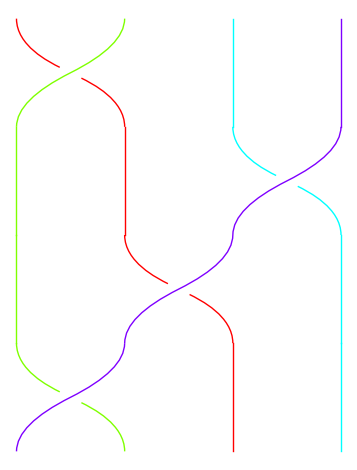

In [46]:
# check that everything is in its right place
check_braid_1 = s1 * s3*s2*s1
check_braid_eq1 = s1 * s3
check_braid_eq2 = s3 * s1
print(check_braid_eq1 == check_braid_eq2)
paint(check_braid_1)

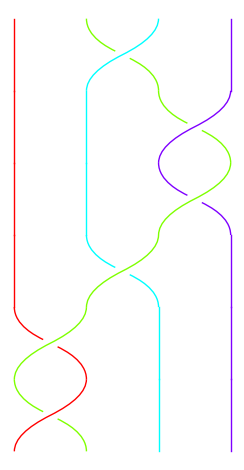

In [76]:
# Generators A_{0, j}, without ~, with i >= 2(?)? they generate ker d_1

a = s2 * s3 * s3 * s2 * s1 * s1 #A_02
b = s3 * s3 * s2 * s1 * s1 * s2 #A_03
c = s3 * s2 * s1 * s1 * s2 * s3 #A_04
paint(a)

In [38]:
def Burau(x):
    return x.burau_matrix()

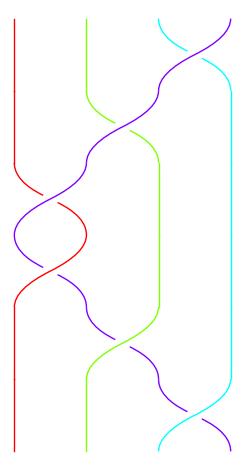

In [79]:
# tA0i stands for \Tilde{A_{0, i}}, which is the image of the Cohen-Wu embedding
tA02 = s2 * s3 * s3 * s2 * S1 * S1
tA03 = s3 * s3 * S2 * S1 * S1 * S2
tA04 = c
tA04.plot(orientation = 'top-bottom')

In [75]:
def commutator(x, y): 
    return x * y * x.inverse() * y.inverse()

commutator(a * c * c * a, c) == commutator(tA02 * tA02, tA04)

False

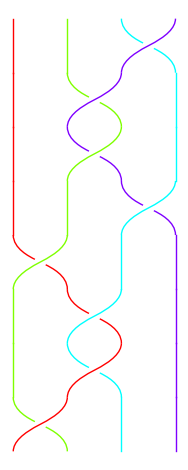

In [18]:
cabled = a.inverse() * b.inverse() * b.inverse()
paint(cabled)

In [19]:
def commutator(x, y): 
    return x * y * x.inverse() * y.inverse()

def conjugate(y, x):
    return x * y * x.inverse()

In [20]:
# simple check: 

first_commutator = commutator(tA02 * tA02, tA04)
second_commutator = commutator(cabled * c * c * cabled, c)
print(first_commutator == second_commutator)

False


In [80]:
# look_for = conjugate(commutator(tA02, tA03), tA02*tA03*tA04)
look_for = commutator(tA02*tA02, tA04) 
target_matrix = Burau(look_for)
max_length = 12

In [81]:
generators = [a, b, c, a.inverse(), b.inverse(), c.inverse()]
labels = ['a', 'b', 'c', 'A', 'B', 'C']  # 'A' means a^-1, 'B' means b^-1

In [ ]:
found = False
for length in range(1, max_length + 1):
    print(length)
    for word_indices in product(range(len(labels)), repeat=length):
        word = B.one()
        word_label = ""
        for i in word_indices:
            word *= generators[i]
            word_label += labels[i]
        word_ = word * tA04 * word.inverse() * tA04.inverse()
        if Burau(word_) == target_matrix:
        # if Burau(word) == target_matrix:
            print(f"Found match: {word_label}")
            found = True
            break
    if found:
        break

if not found:
    print("No match found within the given word length.")

1
2
3
4
5


In [17]:
commutator(a*c*c*a, c) == commutator(tA02*tA02, tA04)

False